In [31]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd
from astropy.units import au

In [32]:
data_file = pd.read_csv("/Users/seallaptop/RustroverProjects/nbodyproblem/my_file.csv",
                        header=0,
                        skiprows=[0, 1, 2],
                        low_memory=False)

names = pd.read_csv("/Users/seallaptop/RustroverProjects/nbodyproblem/my_file.csv", nrows=1,header=None).iloc[0]
one_au = au.to('m')
zoom = 1.5 * one_au

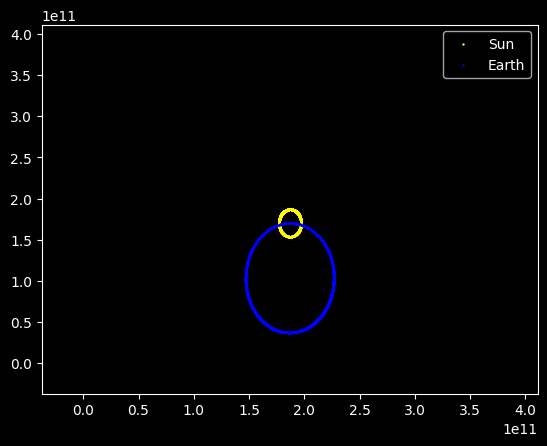

In [33]:
for i in range(2):

    pos_x = data_file.iloc[:, 2*i+4]
    pos_y = data_file.iloc[:, 2*i+5]
    if i == 0:
        real_color = "yellow"
    elif i == 1:
        real_color = "blue"
    else:
        real_color = "white"
    plt.scatter(pos_x, pos_y, s=0.5, label=names[2*i+4], color=real_color)


center_x = data_file.iloc[3, 4]
center_y = data_file.iloc[3, 5]
plt.xlim(center_x - zoom, center_x + zoom)
plt.ylim(center_y - zoom, center_y + zoom)
plt.legend()
plt.show()


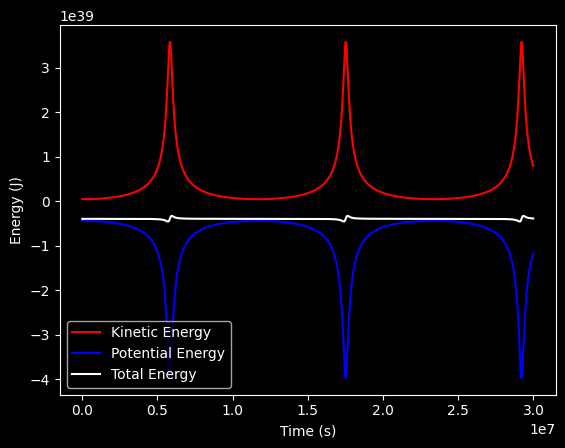

In [35]:
kinetic_energy = data_file.iloc[:, 1]
potential_energy = data_file.iloc[:, 2]
total_energy = data_file.iloc[:, 3]
time = data_file.iloc[:, 0]


kinetic_energy = pd.to_numeric(kinetic_energy, errors='coerce')
potential_energy = pd.to_numeric(potential_energy, errors='coerce')
total = pd.to_numeric(total_energy, errors='coerce')
time = pd.to_numeric(time, errors='coerce')

energy_data = pd.DataFrame({'time': time, 'ke': kinetic_energy, 'pe': potential_energy, 'total': total}).dropna()

plt.plot(energy_data['time'], energy_data['ke'], label="Kinetic Energy", color='red')
plt.plot(energy_data['time'], energy_data['pe'], label="Potential Energy", color='blue')
plt.plot(energy_data['time'], energy_data['total'], label="Total Energy", color='white')

plt.xlabel("Time (s)")
plt.ylabel("Energy (J)")
plt.legend()
plt.show()